In [1]:
# These packages are used in module LLT but not included in MomentumED package. 
# Use the following to add it:
# using Pkg; Pkg.add("ClassicalOrthogonalPolynomials"); Pkg.add("QuadGK")

include("Landau level torus.jl")
using .LLT

# Use the following to add it:
# using Pkg; Pkg.add("CairoMakie")

using CairoMakie # for plotting
CairoMakie.activate!()

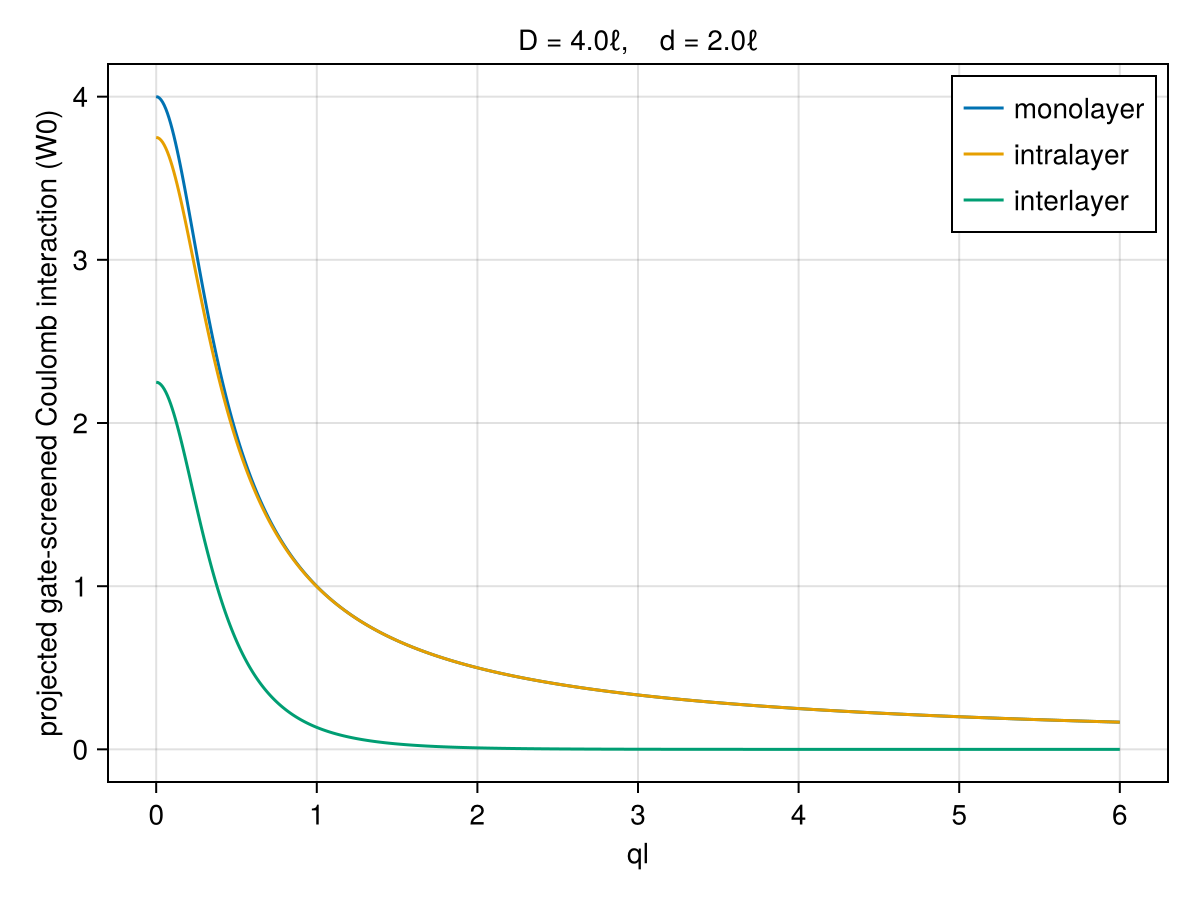

In [2]:
# define and plot Coulomb potential (no projection form factor exp(-0.5*q²l²) )
D_l = 4.0                  # Screening length D/l
d_l = 2.0                  # Inter-layer distance d/l

ql = 0:0.01:6
V_monolayer = LLT.V_Coulomb.(ql; d_l = 0.0, D_l)
V_bilayer_intra = LLT.V_Coulomb.(ql; same_layer = true,  d_l, D_l)
V_bilayer_inter = LLT.V_Coulomb.(ql; same_layer = false, d_l, D_l)

fig = Figure();
ax = Axis(fig[1,1];
    xlabel = "ql", ylabel = "projected gate-screened Coulomb interaction (W0)",
    subtitle = "D = $(round(D_l, digits = 3))ℓ,    d = $(round(d_l, digits = 3))ℓ"
)
lines!(ax, ql, V_monolayer./LLT.W0, label = "monolayer")
lines!(ax, ql, V_bilayer_intra./LLT.W0, label = "intralayer")
lines!(ax, ql, V_bilayer_inter./LLT.W0, label = "interlayer")
axislegend(ax, position = :rt)
fig

mono_Vm[1:5] = [1.4387306666696165, 0.5642744272128494, 0.3535399998383968, 0.2527465514655195, 0.19275200971107534]
intra_Vm[1:5] = [1.4092896170330855, 0.5392850346706811, 0.33217688466985185, 0.23436443553534425, 0.17684093782808377]
inter_Vm[1:5] = [0.42872231066982697, 0.3035083908125457, 0.22730186863709992, 0.1770488833697307, 0.14189548311132605]


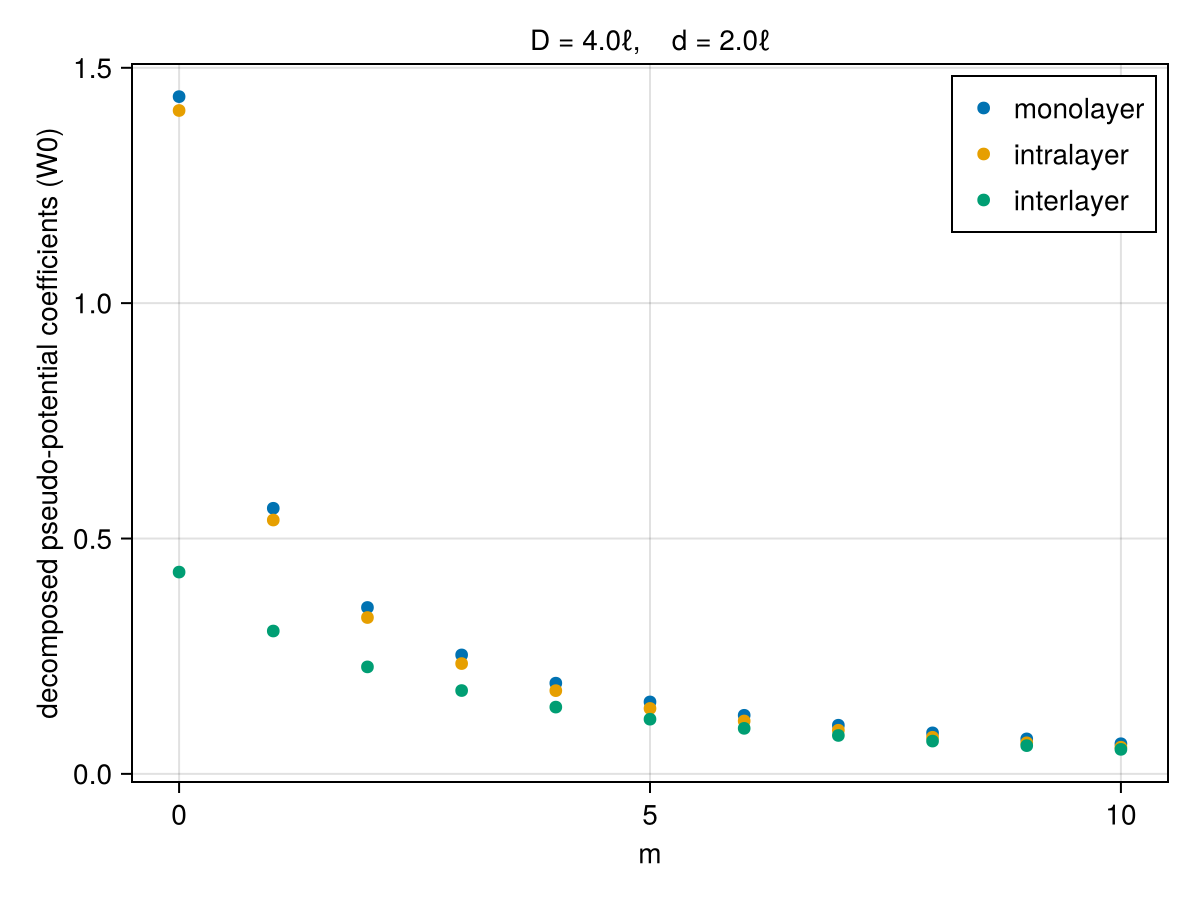

In [3]:
m_list = 0:10

mono_Vm  = LLT.pseudo_potential_decomposition.(m_list; d_l = 0.0, D_l)
intra_Vm = LLT.pseudo_potential_decomposition.(m_list; same_layer = true,  d_l, D_l)
inter_Vm = LLT.pseudo_potential_decomposition.(m_list; same_layer = false, d_l, D_l)

@show mono_Vm[1:5]
@show intra_Vm[1:5]
@show inter_Vm[1:5]


fig = Figure();
ax = Axis(fig[1,1];
    xlabel = "m", ylabel = "decomposed pseudo-potential coefficients (W0)",
    subtitle = "D = $(round(D_l, digits = 3))ℓ,    d = $(round(d_l, digits = 3))ℓ"
)
scatter!(ax, m_list,  mono_Vm, label = "monolayer")
scatter!(ax, m_list, intra_Vm, label = "intralayer")
scatter!(ax, m_list, inter_Vm, label = "interlayer")
axislegend(ax, position = :rt)
fig